In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import soaplite
import soaputils as su
import genBasis
import ase
from ase.visualize import view
from ase.build import bulk
import numpy as np
from numpy.linalg import svd
import matplotlib as matplotlib
import matplotlib.pyplot as p
import numpy.linalg as nl
from scipy.optimize import fmin
import scipy.optimize as op
import time
%matplotlib inline

In [2]:
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

In [3]:
struct2 = bulk('Cu', 'fcc', a=3.6, cubic=True)
struct2l = soaplite._get_supercell(struct2, rCut=2.0)
#view(struct2)
#view(struct2l)
mat2 = soaplite.get_periodic_soap_structure(struct2, myAlphas, myBetas, rCut, NradBas, Lmax)
mat2l = soaplite.get_periodic_soap_structure(struct2l, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat2)
#p.matshow(mat2l)

In [4]:
a0 = 4.0
c0 = 0.9 * a0 #https://link.springer.com/content/pdf/10.1007/BF03215214.pdf
struct3 = bulk('Au', 'fcc', a=a0, cubic=True)
struct3.set_cell(np.diag((a0,a0,c0)), scale_atoms=True)
struct3.set_chemical_symbols(('Au','Cu','Cu','Au'))
struct3l = soaplite._get_supercell(struct3, rCut=2.0)
#view(struct3)
#view(struct3l)
mat3 = soaplite.get_periodic_soap_structure(struct3, myAlphas, myBetas, rCut, NradBas, Lmax)
mat3l = soaplite.get_periodic_soap_structure(struct3l, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat3)
#p.matshow(mat3l)

In [5]:
struct4 = ase.io.read(currentdir + "/glass_cube_CuZr.cfg")
struct4r = su.lim_overlap(su.rand_pos(struct4), dmin=1.5) # randomizing positions and limiting overlap
struct4rb = su.lim_overlap(su.rand_pos(struct4), dmin=2)
mat4 = soaplite.get_periodic_soap_structure(struct4, myAlphas, myBetas, rCut, NradBas, Lmax)
mat4r = soaplite.get_periodic_soap_structure(struct4r, myAlphas, myBetas, rCut, NradBas, Lmax)
mat4rb = soaplite.get_periodic_soap_structure(struct4rb, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat4)
#p.matshow(mat4r)
#p.matshow(mat4rb)

547.5741262722589


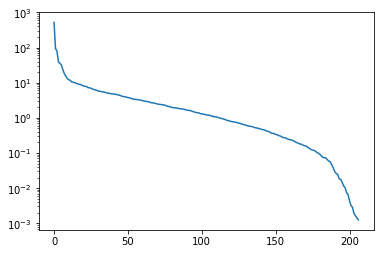

In [42]:
arr = np.random.rand(200,250)
s = svd(mat4, full_matrices=False, compute_uv=False)
p.semilogy(s)
print(np.linalg.norm(s))

In [40]:
N = 100
res = np.zeros(N)
for i in np.arange(N):
    struct4r = su.lim_overlap(su.rand_pos(struct4), dmin=1.5)
    mat4r = soaplite.get_periodic_soap_structure(struct4r, myAlphas, myBetas, rCut, NradBas, Lmax)
    s = svd(mat4r, full_matrices=False, compute_uv=False)
    res[i] = np.linalg.norm(s)

In [41]:
print(res)

[637.16715793 612.30404455 589.64081432 576.44923455 580.55830793
 628.27150055 575.92805898 600.13457044 580.11922205 616.86618148
 612.91869761 598.90016976 575.03067728 578.79504933 608.26401506
 598.8014544  581.60301642 607.88787885 601.60502235 605.59710695
 572.41082308 583.00344532 601.53329403 622.85382594 619.94092626
 626.86849023 581.94072848 586.26888925 611.16441372 587.10078095
 632.85815426 585.66956757 580.44420524 635.40694005 602.70849356
 589.23285421 607.46991404 601.39289285 583.20623132 605.88606465
 619.7540008  607.87329803 572.70805787 620.63651045 572.10182244
 590.1866523  602.58527194 572.54657425 606.39610683 584.54291288
 621.5892519  585.84850961 616.96282546 643.04387456 582.89025498
 612.7105146  598.1183504  596.52114765 587.25085357 554.94571377
 612.3519786  671.11632732 604.9375879  625.33847137 585.07803919
 628.23244435 604.89081407 648.02771199 600.85721925 608.7140443
 644.12297315 601.18638955 623.29924013 612.76392745 588.06554316
 603.860356